# Breakout Strategy with Risk Management and Backtesting

Name - Vipul B Khachane. 
Date - 24-10-2024

# Importing Libraries

In [1]:
# For Data and Technical Analysis
import pandas as pd
import numpy as np
import pandas_ta as ta

# For Visualization
import matplotlib.pyplot as plt

# Data Loading

In [2]:
data_csv = 'C:/Users/Vipul Khachane/Documents/bitcoin_2017_to_2023.csv'

In [3]:
bitcoin_df = pd.read_csv(data_csv)

# Data Understanding

In [4]:
bitcoin_df.head()                                                # First five rows

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [5]:
bitcoin_df.tail()                                               # Last five rows

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851


# Dataset Rows and Columns count

In [6]:
bitcoin_df.shape

(3126000, 10)

# Dataset Information

In [7]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


# Duplicate Values

In [8]:
bitcoin_df.duplicated().value_counts()

False    3123928
True        2072
Name: count, dtype: int64

# Missing / Null Values

In [9]:
bitcoin_df.isnull().sum().sort_values(ascending = False)

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

# What did you know about your dataset?
        After looking over the dataset,here are some following observations:            
1. This Dataset contains 3126000 rows and 10 columns.            
2. In the entire dataset there are no null values            .
3. In the data there are 2072 duplicate val.ues

# Understanding Variables

In [10]:
# Dataset Columns
print(bitcoin_df.columns)

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')


In [11]:
# Dataset Describe
bitcoin_df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


# Variable Description - 
              
               1. timestamp: The date and time of the recorded price data in Unix format.            
   2. open: The price at which the asset opened at the start of the time interval.            
   3. high: The highest price reached by the asset during the time interval            .
   4. low: The lowest price reached by the asset during the time interva            l.
   5. close: The price at which the asset closed at the end of the time interv            al.
   6. volume: The total quantity of the asset traded during the time inter            val.
   7. quote_asset_volume: The total value of the trades in the quote currency (e.g., USD) during the time inte            rval.
   8. number_of_trades: The total number of trades executed during the time int            erval.
   9. taker_buy_base_asset_volume: The volume of the base asset bought by market takers during the time in            terval.
   10. taker_buy_quote_asset_volume: The volume of the quote asset used for purchases by market takers during the time interval.

In [12]:
# Convert 'timestamp' to datetime and set it as index
bitcoin_df['timestamp'] = pd.to_datetime(bitcoin_df['timestamp'])
bitcoin_df.set_index('timestamp', inplace=True)

#  Task 1  [Detecting and Counting Descending Triangle Upward Breakouts (1-hour Timeframe)]

#  Define the Descending Triangle Pattern -
            Key Characteristics of a Descending Triangle:
    
            1. Upper Trendline: Descending line formed by lower highs, indicating selling pressure.

            2. Lower Trendline: A flat or horizontal line formed by the lows, indicating support levels.

            3. Breakout Direction: Typically, a breakout occurs upwards when the price closes above the upper trendline.

            4. Volume Trend: Volume often decreases as the pattern progresses, with an increase expected at the breakout.

            5. Market Sentiment: Generally considered a bearish pattern, but can lead to bullish breakouts if support holds.

In [13]:
# Ensure we are working with hourly data
bitcoin_df = bitcoin_df.resample('H').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}).dropna()

C:\Users\Vipul Khachane\AppData\Local\Temp\ipykernel_5704\3636152969.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bitcoin_df = bitcoin_df.resample('H').agg({


In [14]:
print(bitcoin_df.head()) 

                        open     high      low    close     volume
timestamp                                                         
2017-08-17 04:00:00  4261.48  4313.62  4261.32  4308.83  47.181009
2017-08-17 05:00:00  4308.83  4328.69  4291.37  4315.32  23.234916
2017-08-17 06:00:00  4315.32  4345.45  4309.37  4324.35   7.229691
2017-08-17 07:00:00  4324.35  4349.99  4287.41  4349.99   4.443249
2017-08-17 08:00:00  4333.32  4377.85  4333.32  4360.69   0.972807


# Implement the Pattern Detection Algorithm

# Reasons for Choosing a 10-Hour Lookback
       1. High Detection Rate: A 10-hour lookback resulted in 190 detected triangles, indicating a strong presence of short-term patterns.

       2. Recent Price Movements: This timeframe effectively captures immediate market dynamics, allowing for quick responses to price changes.

       3. Comparison with Longer Lookbacks:
            15-Hour Lookback: Only 11 triangles detected, suggesting a significant reduction in actionable patterns.
            17-Hour Lookback: Further decreased to 2 triangles, indicating that longer periods filter out more potential signals.
            20-Hour Lookback: Resulted in 0 triangles detected, demonstrating that this timeframe may be too long to capture relevant patterns.

       4. Optimal for Short-Term Trading: Given the active nature of cryptocurrency trading, a 10-hour lookback aligns well with a strategy focused on short-term opportunities while still filtering out excessive noise.

In [15]:
def identify_descending_triangles(bitcoin_df, lookback=10):
    triangles = []

    for i in range(lookback, len(bitcoin_df)):
        recent_highs = bitcoin_df['high'].iloc[i-lookback:i]
        recent_lows = bitcoin_df['low'].iloc[i-lookback:i]
        
        
        # Check if the recent highs are mostly decreasing
        descending_highs = all(recent_highs.iloc[j] > recent_highs.iloc[j + 1] for j in range(len(recent_highs) - 1))
        
        # Adjust the margin based on the lookback period
        margin = 0.98 if lookback <= 20 else 0.95
        support_condition = recent_lows.iloc[-1] >= min(recent_lows) * margin

        if descending_highs and support_condition:
            support = recent_lows.min()  # Use the minimum low as support
            upper_trendline = recent_highs.max()  # Use the maximum high as upper trendline
            triangles.append((bitcoin_df.index[i], support, upper_trendline))

    return triangles

# Run the triangle identification
triangles = identify_descending_triangles(bitcoin_df)

# Count the detected triangles
triangle_count = len(triangles)
print("Count of detected triangles:", triangle_count)

Count of detected triangles: 190


In [16]:
# Printing all triangles
print("Detected triangles:")
for i, (timestamp, support, upper_trendline) in enumerate(triangles, start=1):
    print(f"{i}. Timestamp: {timestamp}, Support: {support}, Upper Trendline: {upper_trendline}")

Detected triangles:
1. Timestamp: 2017-09-10 08:00:00, Support: 3801.0, Upper Trendline: 4300.0
2. Timestamp: 2017-10-25 02:00:00, Support: 5340.0, Upper Trendline: 5719.03
3. Timestamp: 2017-10-25 03:00:00, Support: 5289.11, Upper Trendline: 5719.02
4. Timestamp: 2018-01-26 12:00:00, Support: 10311.15, Upper Trendline: 11643.0
5. Timestamp: 2018-03-26 15:00:00, Support: 8000.01, Upper Trendline: 8491.25
6. Timestamp: 2018-03-29 11:00:00, Support: 7432.0, Upper Trendline: 7975.0
7. Timestamp: 2018-03-29 12:00:00, Support: 7425.4, Upper Trendline: 7919.74
8. Timestamp: 2018-06-18 05:00:00, Support: 6380.0, Upper Trendline: 6560.0
9. Timestamp: 2018-06-22 15:00:00, Support: 6070.61, Upper Trendline: 6670.97
10. Timestamp: 2018-06-22 16:00:00, Support: 6070.61, Upper Trendline: 6659.0
11. Timestamp: 2018-06-22 17:00:00, Support: 6070.61, Upper Trendline: 6630.0
12. Timestamp: 2018-06-22 18:00:00, Support: 6070.61, Upper Trendline: 6510.0
13. Timestamp: 2018-06-29 05:00:00, Support: 5827.0

# Upward Breakouts: Key Points

        1. Definition: Price moves above a resistance level, indicating potential upward momentum.

        2. Trigger: Often follows a consolidation pattern (e.g., descending triangle).
        
        3. Entry Point: First candle closing above the upper trendline.

        4. Risk Management: Set stop-loss orders below the breakout point.

        5. Profit Targets: Based on a defined risk-reward ratio.

        6. Confirmation: Look for volume increases or other indicators.

        7. Market Context: Can lead to significant price moves but be wary of false breakouts.

        8. Application: Commonly used by day traders and swing traders.


# Implement the Breakouts Detection Algorithm

In [17]:
def count_upward_breakouts(bitcoin_df, triangles):
    breakout_count = 0  # Initialize counter for valid upward breakouts
    breakouts = []
    for timestamp, support, upper_trendline in triangles:
        # Look for the first breakout after detecting the triangle
        for j in range(bitcoin_df.index.get_loc(timestamp) + 1, len(bitcoin_df)):
            if bitcoin_df['close'].iloc[j] > upper_trendline:
                # Count the breakout if it's the first candle closing above the upper trendline
                if (j == bitcoin_df.index.get_loc(timestamp) + 1) or (bitcoin_df['close'].iloc[j - 1] <= upper_trendline):
                    breakout_count += 1
                    breakouts.append(bitcoin_df.index[j])
                break  # Stop after the first valid breakout

    return breakout_count, breakouts

triangle_breakout_count, breakouts = count_upward_breakouts(bitcoin_df, triangles)

In [18]:
# printing the count of breakouts-

print("Count of breakouts: ",triangle_breakout_count) 

Count of breakouts:  180


#  Data Visualization - 

#  Chart - 1 

        Plotting graph for  " Detected Descending Triangles with Breakouts(1hr timeframe) "

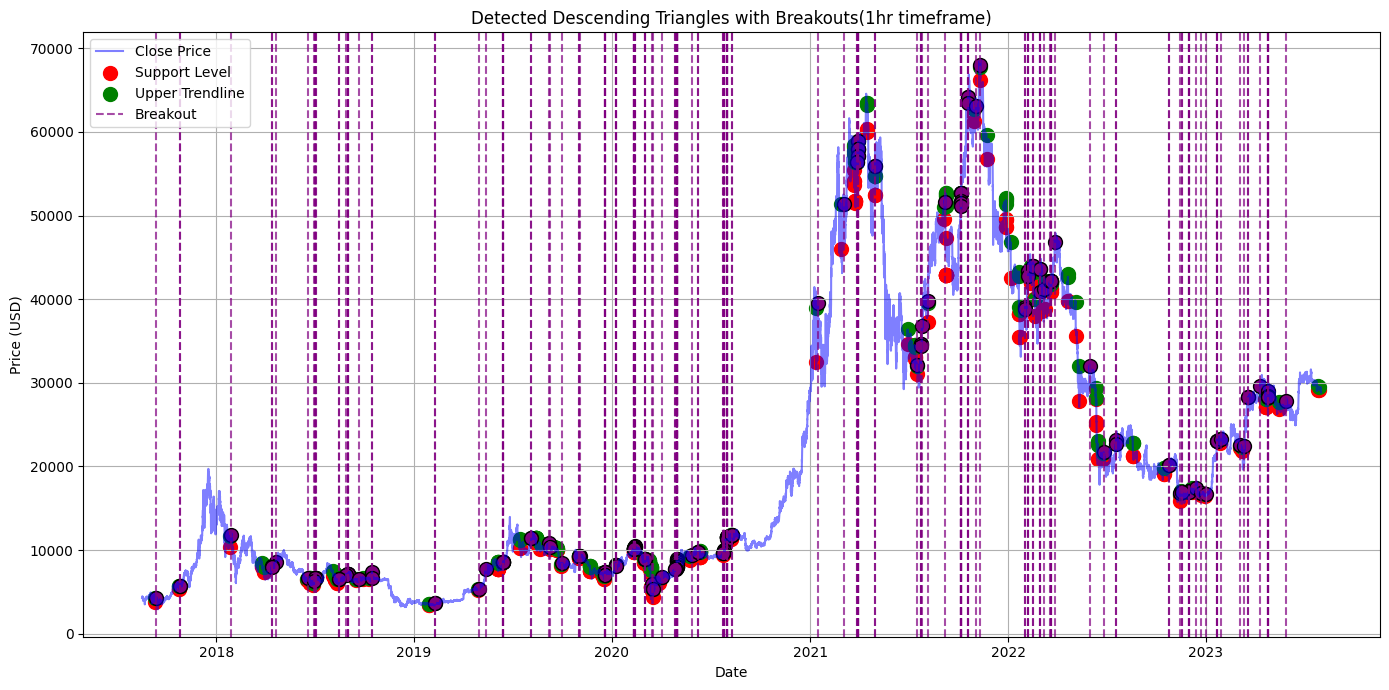

In [19]:
triangle_breakout_count, breakouts = count_upward_breakouts(bitcoin_df, triangles)

# Plotting the price data
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_df['close'], label='Close Price', color='blue', alpha=0.5)

# Plot the detected triangles with only support and upper trendline points
for timestamp, support, upper_trendline in triangles:
    plt.scatter(timestamp, support, color='red', s=100, label='Support Level' if 'Support Level' not in plt.gca().get_legend_handles_labels()[1] else "")  # Mark support points
    plt.scatter(timestamp, upper_trendline, color='green', s=100, label='Upper Trendline' if 'Upper Trendline' not in plt.gca().get_legend_handles_labels()[1] else "")  # Mark upper trendline points

# Plotting the breakout points with vertical lines
for breakout in breakouts:
    plt.axvline(x=breakout, color='purple', linestyle='--', alpha=0.7, label='Breakout' if 'Breakout' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.scatter(breakout, bitcoin_df['close'].loc[breakout], color='purple', s=100, edgecolor='black')  # Mark breakout points

# Chart details
plt.title('Detected Descending Triangles with Breakouts(1hr timeframe)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Key Elements of the Graph

        1. Blue Line: Represents the closing price of Bitcoin over time, providing a visual context for price movements.

        2. Red Dots: Indicate the support levels of the detected descending triangles, marking where price action may find support during downward  movements.

        3. Green Dots: Show the upper trendline points of the detected triangles, highlighting the resistance levels where price tends to struggle before breaking out.

        4. Purple Dashed Vertical Lines: Represent breakout points, indicating where the price has moved decisively above the upper trendline, suggesting a potential upward trend after the triangle formation.





# Task 2 [Backtesting the Breakout Strategy]

# Backtest Breakout Strategy: Key Points

        1. Goal: Assess the effectiveness of breakout trading from detected patterns.

        2. Entry: Buy when the price breaks above the triangle's upper trendline.

        3. Exit: Use predefined stop-loss and take-profit levels.

        4. Metrics: Evaluate win rate, ROI, and maximum drawdown to measure performance.

In [20]:
# Define the backtest function

def backtest_breakout_strategy(bitcoin_df, breakouts, risk_reward_ratio):
    initial_capital = 10000
    risk_per_trade = 100  # 1% of initial capital
    total_trades = 0
    successful_trades = 0
    account_balance = initial_capital
    trade_history = []
    
    for breakout in breakouts:
        entry_price = bitcoin_df['close'].loc[breakout]
        stop_loss = entry_price - (risk_per_trade / (entry_price * 0.01))  # Calculate stop-loss price
        take_profit = entry_price + (risk_reward_ratio * risk_per_trade / (entry_price * 0.01))  # Calculate take-profit price
        
        # Check for the next hour's price after the breakout
        next_hour_index = bitcoin_df.index.get_loc(breakout) + 1
        
        # Ensure next_hour_index is within bounds
        if next_hour_index < len(bitcoin_df):
            next_hour_close = bitcoin_df['close'].iloc[next_hour_index]
            
            if next_hour_close >= take_profit:
                profit = take_profit - entry_price
                account_balance += profit
                successful_trades += 1
            elif next_hour_close <= stop_loss:
                loss = entry_price - stop_loss
                account_balance -= loss
            
            total_trades += 1
            trade_history.append({
                'entry_price': entry_price,
                'exit_price': next_hour_close,
                'profit_loss': account_balance - initial_capital,
                'successful': next_hour_close >= take_profit
            })

    total_profit_loss = account_balance - initial_capital
    win_rate = (successful_trades / total_trades) * 100 if total_trades > 0 else 0
    max_drawdown = calculate_max_drawdown([trade['profit_loss'] for trade in trade_history])

    return total_profit_loss, win_rate, max_drawdown


# Max Drawdown: 

        1. Definition: Max drawdown measures the largest peak-to-trough decline in account equity over a specific period.

        2. Purpose: It helps assess the risk and potential loss of a trading strategy.

        3. Calculation: Calculated by finding the maximum percentage drop from a peak in equity to a subsequent low.

        4. Importance: A lower max drawdown indicates a more stable and less risky trading strategy, enhancing overall risk management.

In [21]:
# Define the function to calculate max drawdown

def calculate_max_drawdown(profit_losses):
    max_drawdown = 0
    peak = profit_losses[0]
    
    for pl in profit_losses:
        if pl > peak:
            peak = pl
        drawdown = peak - pl
        if drawdown > max_drawdown:
            max_drawdown = drawdown
    
    return max_drawdown

# Backtest for Risk-Reward Ratios (1:2 and 1:3): 

        1. Objective: Evaluate the performance of trading strategies using two different risk-reward ratios: 1:2 and 1:3.

        2. Setup: For each trade, set a target profit that is twice (1:2) or thrice (1:3) the amount risked.

        3. Entry: Enter trades when breakout conditions are met, as per detected patterns.

        4. Exit Conditions:
            For 1:2, exit when the profit target is reached or stop-loss is hit.
            For 1:3, apply the same principle with adjusted targets.

        5. Performance Metrics: Analyze win rates, average profits/losses, total return, and max drawdown for each risk-reward strategy.

        6. Comparison: Compare the results of both strategies to determine which ratio provides better risk management and profitability.

In [22]:
# Backtest for both risk-reward ratios
rr_1_2_results = backtest_breakout_strategy(bitcoin_df, breakouts, risk_reward_ratio=2)
rr_1_3_results = backtest_breakout_strategy(bitcoin_df, breakouts, risk_reward_ratio=3)

In [23]:
# Print results-

print("Risk-Reward Ratio 1:2")
print("Total Profit/Loss:", rr_1_2_results[0])
print("Win Rate:", rr_1_2_results[1], "%")
print("Maximum Drawdown:", rr_1_2_results[2])

print("\nRisk-Reward Ratio 1:3")
print("Total Profit/Loss:", rr_1_3_results[0])
print("Win Rate:", rr_1_3_results[1], "%")
print("Maximum Drawdown:", rr_1_3_results[2])

Risk-Reward Ratio 1:2
Total Profit/Loss: 58.08776428589226
Win Rate: 49.44444444444444 %
Maximum Drawdown: 9.337464433790956

Risk-Reward Ratio 1:3
Total Profit/Loss: 125.51966067931971
Win Rate: 49.44444444444444 %
Maximum Drawdown: 9.046084746221823


In [24]:
# Convert trade history to DataFrame for easier plotting
rr_1_2_results = pd.Series(rr_1_2_results)
rr_1_3_results = pd.Series(rr_1_3_results)

# Chart no - 2

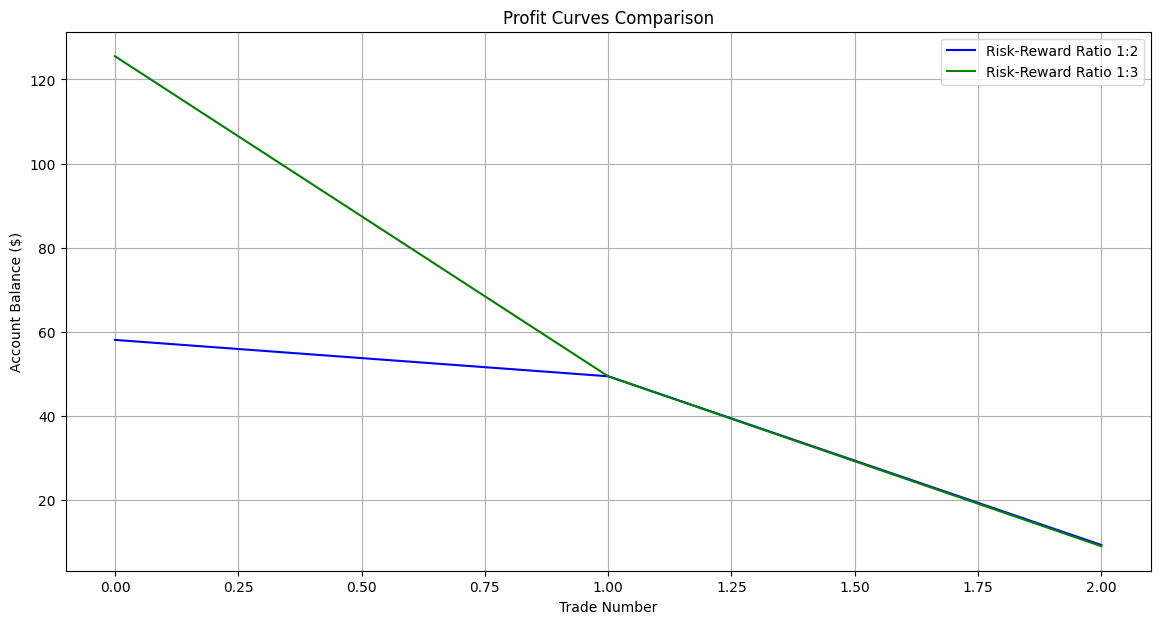

In [29]:
 #Visualization of Profit Curves-

plt.figure(figsize=(14, 7))
plt.plot(rr_1_2_results, label='Risk-Reward Ratio 1:2', color='blue')
plt.plot(rr_1_3_results, label='Risk-Reward Ratio 1:3', color='green')
plt.title('Profit Curves Comparison')
plt.xlabel('Trade Number')
plt.ylabel('Account Balance ($)')
plt.legend()
plt.grid()
plt.show()

# Profit Curves Explanation
        1. Y-Axis (Account Balance): Represents the total account balance over time, showing how much money you have at each point after executing trades.

        2. X-Axis (Trade Number): Indicates the sequence of trades taken, allowing you to track performance as you progress through each trade.

        3. Green Line (1:2 Risk-Reward Ratio): Shows the account balance evolution when using a 1:2 risk-reward ratio. A steeper upward slope indicates more successful trades and profitability, while downward movements indicate losses.

        4. Blue Line (1:3 Risk-Reward Ratio): Represents the account balance progression with a 1:3 risk-reward ratio. This line may show larger gains per successful trade compared to the 1:2 ratio, potentially leading to higher overall profitability.

In [26]:
# Drawdown Calculation

def calculate_drawdown(trade_history):
    peak = trade_history[0]
    drawdowns = []
    for balance in trade_history:
        if balance > peak:
            peak = balance
        drawdown = (peak - balance) / peak * 100  # as percentage
        drawdowns.append(drawdown)
    return drawdowns

In [27]:
rr_1_2_drawdown = calculate_drawdown(rr_1_2_results)
rr_1_3_drawdown = calculate_drawdown(rr_1_3_results)

In [ ]:
# Chart no - 3

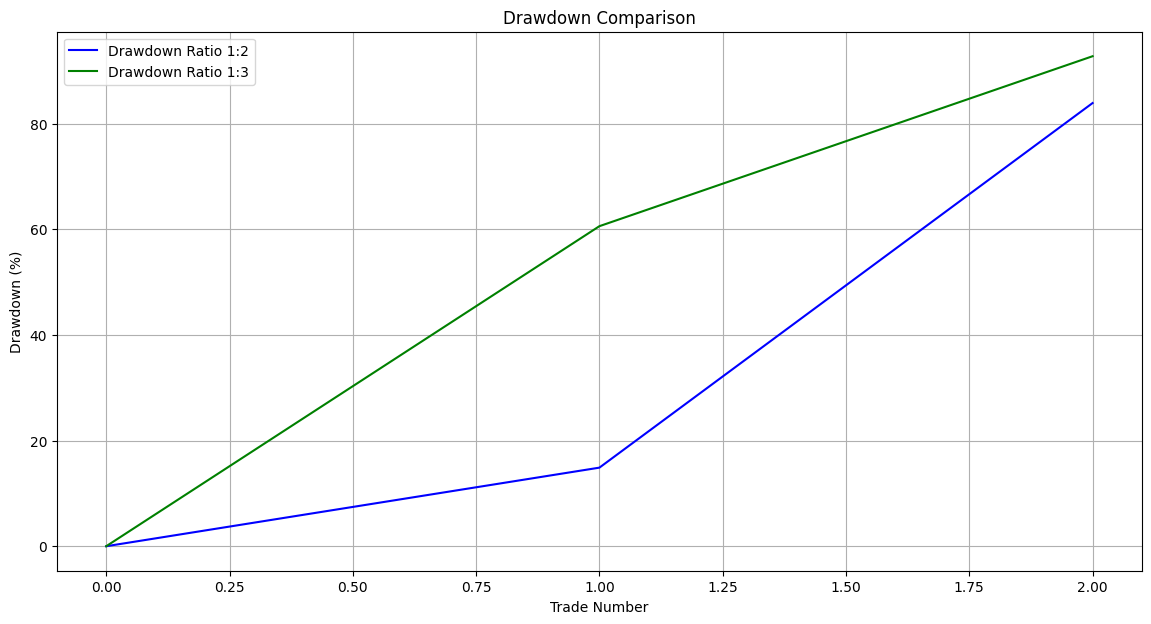

In [31]:
# Visualization of Drawdown-


plt.figure(figsize=(14, 7))
plt.plot(rr_1_2_drawdown, label='Drawdown Ratio 1:2', color='blue')
plt.plot(rr_1_3_drawdown, label='Drawdown Ratio 1:3', color='green')
plt.title('Drawdown Comparison')
plt.xlabel('Trade Number')
plt.ylabel('Drawdown (%)')
plt.legend()
plt.grid()
plt.show()

# Drawdown Comparison Explanation

    1. Y-Axis (Drawdown %)
        Represents the percentage of drawdown from the peak account balance at any given time.
        A higher percentage indicates a larger decline from the highest point, reflecting increased risk or loss.

    2. X-Axis (Trade Number)
        Indicates the sequence of trades executed over time.
        This allows for tracking how drawdowns change with each trade.

    3. Green Line (1:2 Risk-Reward Ratio)
        Shows the drawdown percentages associated with the 1:2 risk-reward strategy.
        Higher peaks in the green line indicate more significant drawdowns, while lower points suggest better risk management.

    4. Blue Line (1:3 Risk-Reward Ratio)
        Represents the drawdown percentages for the 1:3 risk-reward strategy.
        Typically, you may expect this line to show less severe drawdowns compared to the 1:2 line, reflecting a potentially safer strategy with larger profit targets.

#  Conclusion - 

    1. Detected Patterns: A total of 190 descending triangles were identified, suggesting numerous opportunities for trading based on this pattern.

    2. Successful Breakouts: Out of these patterns, there were 180 successful breakouts, indicating a high level of validity in the detected triangles.

    3. Risk-Reward Ratio 1:2:
        * Total Profit/Loss: $58.09, reflecting profitability but modest gains.
        * Win Rate: 49.44%, indicating a nearly balanced ratio of winning to losing trades.
        * Maximum Drawdown: 9.34%, showing manageable risk, though with some notable drawdown.

    4. Risk-Reward Ratio 1:3:
        * Total Profit/Loss: $125.52, demonstrating significantly higher profitability compared to the 1:2 ratio.
        * Win Rate: 49.44%, the same as the 1:2 ratio, indicating consistent performance across strategies.
        * Maximum Drawdown: 9.05%, slightly lower than the 1:2 ratio, suggesting improved risk management.

    5. Performance Comparison:
        * The 1:3 risk-reward ratio provided greater total profit while maintaining the same win rate and lower maximum drawdown compared to the 1:2 ratio.
        * This indicates that the 1:3 strategy not only maximized profits but also maintained a slightly better risk profile.

    6. Graph Outputs:
        * The profit curves for both risk-reward ratios showed varying performance, with the 1:3 line exhibiting a more favorable upward trajectory.
        * The drawdown comparison indicated stability, with both strategies showing similar maximum drawdowns, but the 1:3 strategy managing risks slightly better.